Описание стенда
===============
- CPU: Intel Core i5-12500H, 4.5GHz
- RAM: 16Gb LPDDR5 6400MHz
- Ubuntu 22.04

Подготовка
==========
- Swapfile отключен
- Частота процессора выставлена на максимальную
- Отключены сильно нагружающие систему фоновые приложения
- Перед замерами код выполняется на копиях исходных дизъюнктов $10$ раз для "прогрева"
- Процесс прибивается к одному ядру

Детали замеров
==============
- CNF: `./data/jnf301.cnf`, $100$ переменных, $900$ дизъюнктов
- Замеряется только выполнение `dpll()`, работа с файловой системой и выводом - нет
- Для замеров используется вызов `clock()` из `<time.h>`
- Выборка размером $40$

In [1]:
t=(4.703678,4.701078,4.703378,4.703116,4.702418,4.707436,4.702408,4.706020,4.703917,4.702212,4.704395,4.702475,4.703754,4.702632,4.703079,4.703793,4.701826,4.704171,4.703340,4.705439,4.702792,4.704191,4.705396,4.704080,4.704728,4.702810,4.703549,4.705015,4.701353,4.703896,4.705883,4.704605,4.705189,4.701700,4.705131,4.702224,4.704199,4.703923,4.702381,4.703323,)

In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

(array([ 3.,  3.,  7.,  6., 10.,  3.,  5.,  2.,  0.,  1.]),
 array([4.701078 , 4.7017138, 4.7023496, 4.7029854, 4.7036212, 4.704257 ,
        4.7048928, 4.7055286, 4.7061644, 4.7068002, 4.707436 ]),
 <BarContainer object of 10 artists>)

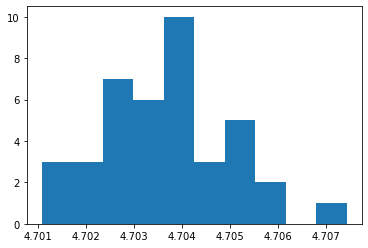

In [3]:
plt.hist(t)

In [4]:
stats.normaltest(t)

NormaltestResult(statistic=1.417128706103814, pvalue=0.49235053185468836)

In [5]:
stats.shapiro(t)

ShapiroResult(statistic=0.9846031069755554, pvalue=0.8519970774650574)

Оба $pvalue > 0.05$, данные проходят тесты на нормальность

Среднее

In [6]:
np.mean(t)

4.703673325

Стандартное отклонение

In [7]:
np.std(t, ddof=1)

0.001378008306094994

Стандартное отклонение среднего

In [8]:
np.std(t, ddof=1)/math.sqrt(len(t))

0.00021788224409453346

Доверительный интервал

In [9]:
stats.t.ppf(0.975, df=len(t)-1)*stats.sem(t)

0.00044070843495838045

Результаты
- Погрешность - $0.00$
- Среднее - $4.70$
- Интервал - $4.70 \pm 0.01$

`clock()` имеет точность измерения до мкс, округление до двух цифр после запятой